In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [4]:
startup = pd.read_csv("50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dummy = pd.get_dummies(startup['State'])    
startup = pd.concat([startup,dummy],axis=1)   

In [6]:
## Dropping the categorical columns after creating their dummy variables
startup = startup.drop(['State'],axis=1)

In [7]:
startup

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [8]:
def prep_model(hidden_dim):
    model = Sequential()
    for i in range(1,len(hidden_dim)-1):
        if (i==1):
            model.add(Dense(hidden_dim[i],input_dim=hidden_dim[0],kernel_initializer="normal",activation="relu"))
        else:
            model.add(Dense(hidden_dim[i],activation="relu"))
    model.add(Dense(hidden_dim[-1]))
    model.compile(loss="mean_squared_error",optimizer="adam",metrics = ["accuracy"])
    return (model)

In [9]:
column_names = list(startup.columns)
predictors = column_names[0:6]
target = column_names[6]


In [10]:
first_model = prep_model([6,50,1])
first_model.fit(np.array(startup[predictors]),np.array(startup[target]),epochs=50)
pred_train = first_model.predict(np.array(startup[predictors]))
pred_train = pd.Series([i[0] for i in pred_train])
rmse_value = np.sqrt(np.mean((pred_train-startup[target])**2))
print('RMSE Value is : ', rmse_value)

Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 65673293.9200 - accuracy: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 0s 140us/step - loss: 25892720.7200 - accuracy: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 0s 100us/step - loss: 18496492.1600 - accuracy: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 0s 112us/step - loss: 25410254.0800 - accuracy: 0.0000e+00
Epoch 5/50
50/50 [==============================] - 0s 100us/step - loss: 26187718.8800 - accuracy: 0.0000e+00
Epoch 6/50
50/50 [==============================] - 0s 126us/step - loss: 18772162.7200 - accuracy: 0.0000e+00
Epoch 7/50
50/50 [==============================] - 0s 160us/step - loss: 12546140.1600 - accuracy: 0.0000e+00
Epoch 8/50
50/50 [==============================] - 0s 120us/step - loss: 9769155.9200 - accuracy: 0.0000e+00
Epoch 9/50
50/50 [==============================] - 0s 102us/step - loss: 10998985.7400 - accuracy: 0.0000e+00
Epoc

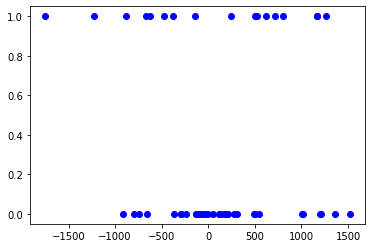

array([[ 1.       , -0.0797651],
       [-0.0797651,  1.       ]])

In [13]:
import matplotlib.pyplot as plt
plt.plot(pred_train,startup[target],"bo")
plt.show()
np.corrcoef(pred_train,startup[target]) # we got high correlation 89%